In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/indian-stat/Indian_states.shp
/kaggle/input/indian-stat/Indian_states.prj
/kaggle/input/indian-stat/Indian_states.dbf
/kaggle/input/indian-stat/Indian_states.shx
/kaggle/input/pre-cog/judges_clean/judges_clean.csv
/kaggle/input/pre-cog/acts_sections/acts_sections.csv
/kaggle/input/pre-cog/cases/cases_2015.csv
/kaggle/input/pre-cog/cases/cases_2012.csv
/kaggle/input/pre-cog/cases/cases_2018.csv
/kaggle/input/pre-cog/cases/cases_2013.csv
/kaggle/input/pre-cog/cases/cases_2017.csv
/kaggle/input/pre-cog/cases/cases_2010.csv
/kaggle/input/pre-cog/cases/cases_2014.csv
/kaggle/input/pre-cog/cases/cases_2016.csv
/kaggle/input/pre-cog/cases/cases_2011.csv
/kaggle/input/pre-cog/keys/type_name_key.csv
/kaggle/input/pre-cog/keys/cases_district_key.csv
/kaggle/input/pre-cog/keys/act_key.csv
/kaggle/input/pre-cog/keys/disp_name_key.csv
/kaggle/input/pre-cog/keys/purpose_name_key.csv
/kaggle/input/pre-cog/keys/cases_state_key.csv
/kaggle/input/pre-cog/keys/section_key.csv
/kaggle/input/

In [2]:
case = pd.read_csv('/kaggle/input/pre-cog/cases/cases_2017.csv')
print(case.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201900000012017  2017           1          1         1   
1  01-01-01-201900000022017  2017           1          1         1   
2  01-01-01-201900000032017  2017           1          1         1   
3  01-01-01-201900000042017  2017           1          1         1   
4  01-01-01-201900000052017  2017           1          1         1   

               cino             judge_position female_defendant  \
0  MHNB030000102017  chief judicial magistrate           0 male   
1  MHNB030000282017  chief judicial magistrate           0 male   
2  MHNB030000292017  chief judicial magistrate    -9998 unclear   
3  MHNB030000302017  chief judicial magistrate           0 male   
4  MHNB030000312017  chief judicial magistrate    -9998 unclear   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male           -9999               0     1943.0        3206.0   
1            0 m

In [3]:
acts_sec = pd.read_csv('/kaggle/input/pre-cog/acts_sections/acts_sections.csv')

mer_1 = case.merge(acts_sec, left_on = "ddl_case_id", right_on = "ddl_case_id", how = "left")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print(mer_1.iloc[900403:900440,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
900403  01-26-02-203400024282017  2017           1         26         2   
900404  01-26-02-203400024292017  2017           1         26         2   
900405  01-26-02-203400024302017  2017           1         26         2   
900406  01-26-02-203400024312017  2017           1         26         2   
900407  01-26-02-203400024322017  2017           1         26         2   
900408  01-26-02-203400024332017  2017           1         26         2   
900409  01-26-02-203400024342017  2017           1         26         2   
900410  01-26-02-203400024352017  2017           1         26         2   
900411  01-26-02-203400024362017  2017           1         26         2   
900412  01-26-02-203400024372017  2017           1         26         2   
900413  01-26-02-203400024382017  2017           1         26         2   
900414  01-26-02-203400024392017  2017           1         26         2   
900415  01-26-02-20340002

In [5]:
state = pd.read_csv('/kaggle/input/pre-cog/keys/cases_state_key.csv')

In [6]:
state_arr = state[state.columns[1:3]].values.tolist()
set(tuple(element) for element in state_arr)
state_x = [list(t) for t in set(tuple(element) for element in state_arr)]

In [7]:
print(state_x)

[[4, 'Kerala'], [21, 'Meghalaya'], [16, 'West Bengal'], [11, 'Orissa'], [31, 'Diu and Daman'], [1, 'Maharashtra'], [29, 'Telangana'], [9, 'Rajasthan'], [3, 'Karnataka'], [24, 'Sikkim'], [32, 'DNH at Silvasa'], [18, 'Chhattisgarh'], [25, 'Manipur'], [10, 'Tamil Nadu'], [2, 'Andhra Pradesh'], [6, 'Assam'], [13, 'Uttar Pradesh'], [15, 'Uttarakhand'], [8, 'Bihar'], [27, 'Chandigarh'], [23, 'Madhya Pradesh'], [33, 'Ladakh'], [17, 'Gujarat'], [7, 'Jharkhand'], [14, 'Haryana'], [20, 'Tripura'], [19, 'Mizoram'], [5, 'Himachal Pradesh'], [30, 'Goa'], [26, 'Delhi'], [22, 'Punjab'], [12, 'Jammu and Kashmir']]


In [8]:
states = pd.DataFrame(state_x, columns = ['state_code', 'state'])

In [9]:
print(states)

    state_code              state
0            4             Kerala
1           21          Meghalaya
2           16        West Bengal
3           11             Orissa
4           31      Diu and Daman
5            1        Maharashtra
6           29          Telangana
7            9          Rajasthan
8            3          Karnataka
9           24             Sikkim
10          32     DNH at Silvasa
11          18       Chhattisgarh
12          25            Manipur
13          10         Tamil Nadu
14           2     Andhra Pradesh
15           6              Assam
16          13      Uttar Pradesh
17          15        Uttarakhand
18           8              Bihar
19          27         Chandigarh
20          23     Madhya Pradesh
21          33             Ladakh
22          17            Gujarat
23           7          Jharkhand
24          14            Haryana
25          20            Tripura
26          19            Mizoram
27           5   Himachal Pradesh
28          30

In [10]:
mer_2 = mer_1.merge(states, left_on = "state_code", right_on = "state_code", how = "left")

In [11]:
print(mer_2.iloc[899394:900001,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
899394  01-26-02-203400014192017  2017           1         26         2   
899395  01-26-02-203400014202017  2017           1         26         2   
899396  01-26-02-203400014212017  2017           1         26         2   
899397  01-26-02-203400014222017  2017           1         26         2   
899398  01-26-02-203400014232017  2017           1         26         2   
...                          ...   ...         ...        ...       ...   
899996  01-26-02-203400020212017  2017           1         26         2   
899997  01-26-02-203400020222017  2017           1         26         2   
899998  01-26-02-203400020232017  2017           1         26         2   
899999  01-26-02-203400020242017  2017           1         26         2   
900000  01-26-02-203400020252017  2017           1         26         2   

                    cino             judge_position female_defendant  \
899394  MHAH030020282017  c

In [12]:
state_count = mer_2.groupby('state').count().reset_index()

In [13]:
print(state_count)

                state  ddl_case_id     year  state_code  dist_code  court_no  \
0      Andhra Pradesh       309346   309346      309346     309346    309346   
1               Assam       214503   214503      214503     214503    214503   
2               Bihar       479259   479259      479259     479259    479259   
3          Chandigarh        33211    33211       33211      33211     33211   
4        Chhattisgarh       192181   192181      192181     192181    192181   
5      DNH at Silvasa          903      903         903        903       903   
6               Delhi       387146   387146      387146     387146    387146   
7       Diu and Daman         1558     1558        1558       1558      1558   
8                 Goa        32446    32446       32446      32446     32446   
9             Gujarat       768727   768727      768727     768727    768727   
10            Haryana       593351   593351      593351     593351    593351   
11   Himachal Pradesh       146048   146

In [14]:
state_count.replace("Orissa", 
           "Odisha", 
           inplace=True)

state_count.replace("DNH at Silvasa", 
           "Dadara & Nagar Havelli", 
           inplace=True)

state_count.replace("Diu and Daman", 
           "Daman & Diu", 
           inplace=True)

state_count.replace("Jammu and Kashmir", 
           "Jammu & Kashmir", 
           inplace=True)

state_count.replace("Delhi", 
           "NCT of Delhi", 
           inplace=True)

print(state_count)

                     state  ddl_case_id     year  state_code  dist_code  \
0           Andhra Pradesh       309346   309346      309346     309346   
1                    Assam       214503   214503      214503     214503   
2                    Bihar       479259   479259      479259     479259   
3               Chandigarh        33211    33211       33211      33211   
4             Chhattisgarh       192181   192181      192181     192181   
5   Dadara & Nagar Havelli          903      903         903        903   
6             NCT of Delhi       387146   387146      387146     387146   
7              Daman & Diu         1558     1558        1558       1558   
8                      Goa        32446    32446       32446      32446   
9                  Gujarat       768727   768727      768727     768727   
10                 Haryana       593351   593351      593351     593351   
11        Himachal Pradesh       146048   146048      146048     146048   
12         Jammu & Kashmi

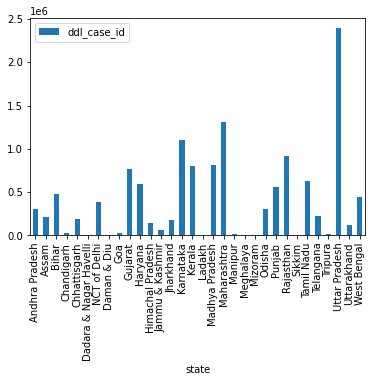

In [15]:
state_count.plot(x="state",y="ddl_case_id", kind="bar")
plt.pyplot.savefig('state_bar_2017.png')

In [16]:
shp = gpd.read_file('/kaggle/input/indian-stat/Indian_states.shp')
state_map = shp.set_index('st_nm').join(state_count.set_index('state'))
print(state_map)

                                                                   geometry  \
st_nm                                                                         
Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...   
Arunanchal Pradesh        POLYGON ((96.16261 29.38078, 96.16860 29.37432...   
Assam                     MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...   
Bihar                     MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...   
Chandigarh                POLYGON ((76.84147 30.75996, 76.83599 30.73623...   
Chhattisgarh              POLYGON ((83.33532 24.09885, 83.35346 24.09627...   
Dadara & Nagar Havelli    POLYGON ((73.20657 20.12216, 73.20797 20.10650...   
Daman & Diu               MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...   
Goa                       MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...   
Gujarat                   MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...   
Haryana                   POLYGON ((76.85065 30.8751

In [17]:
 state_map['ddl_case_id'] = state_map['ddl_case_id'].fillna(0)

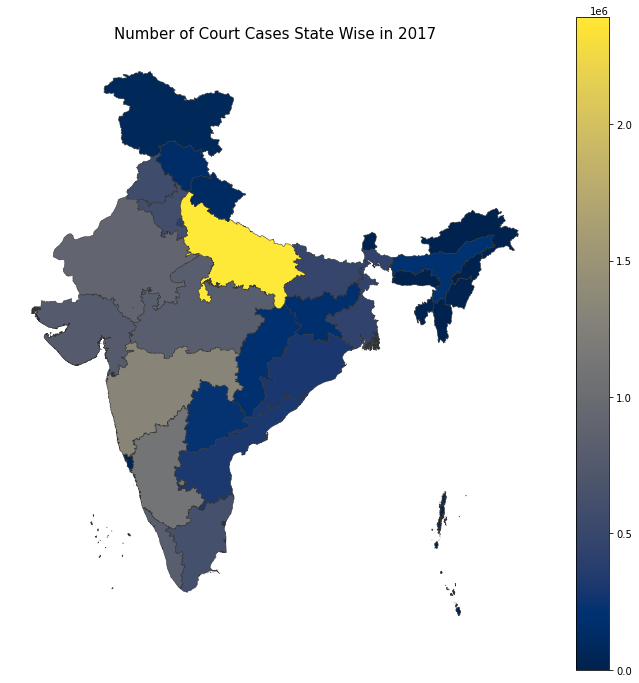

In [18]:
fig, ax = plt.pyplot.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Number of Court Cases State Wise in 2017',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = state_map.plot(column='ddl_case_id', cmap='cividis', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

plt.pyplot.savefig('state_map_2017.png')

In [19]:
state_2017 = state_map.iloc[:,[1]]
print(state_2017)

                          ddl_case_id
st_nm                                
Andaman & Nicobar Island          0.0
Arunanchal Pradesh                0.0
Assam                        214503.0
Bihar                        479259.0
Chandigarh                    33211.0
Chhattisgarh                 192181.0
Dadara & Nagar Havelli          903.0
Daman & Diu                    1558.0
Goa                           32446.0
Gujarat                      768727.0
Haryana                      593351.0
Himachal Pradesh             146048.0
Jammu & Kashmir               67300.0
Jharkhand                    175810.0
Karnataka                   1100310.0
Kerala                       806106.0
Lakshadweep                       0.0
Madhya Pradesh               816343.0
Maharashtra                 1314965.0
Manipur                       15548.0
Meghalaya                      7588.0
Mizoram                        1936.0
Nagaland                          0.0
NCT of Delhi                 387146.0
Puducherry  

In [20]:
state_2017.to_csv('state_2017.csv')